# Data exploration and visualisation

In this notebook we are going to list number of images for each class, describe characteristics of images like size and colour, position of brain in the image, and check if all images share these characteristics.

In general, the idea is to create some background about the MRIs dataset.

In [1]:
import os
import glob
import torch
from PIL import Image, ImageOps
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# data folder size
!du -sh data/alzheimers_mri_dataset
# counting files per folder class
!echo "data/alzheimers_mri_dataset/test/MildDemented"
!ls data/alzheimers_mri_dataset/test/MildDemented | wc -l
!echo "data/alzheimers_mri_dataset/test/ModerateDemented"
!ls data/alzheimers_mri_dataset/test/ModerateDemented | wc -l
!echo "data/alzheimers_mri_dataset/test/NonDemented"
!ls data/alzheimers_mri_dataset/test/NonDemented | wc -l
!echo "data/alzheimers_mri_dataset/test/VeryMildDemented"
!ls data/alzheimers_mri_dataset/test/VeryMildDemented | wc -l
!echo "data/alzheimers_mri_dataset/train/MildDemented"
!ls data/alzheimers_mri_dataset/train/MildDemented | wc -l
!echo "data/alzheimers_mri_dataset/train/ModerateDemented"
!ls data/alzheimers_mri_dataset/train/ModerateDemented | wc -l
!echo "data/alzheimers_mri_dataset/train/NonDemented"
!ls data/alzheimers_mri_dataset/train/NonDemented | wc -l
!echo "data/alzheimers_mri_dataset/train/VeryMildDemented"
!ls data/alzheimers_mri_dataset/train/VeryMildDemented | wc -l

51M	data/alzheimers_mri_dataset
data/alzheimers_mri_dataset/test/MildDemented
179
data/alzheimers_mri_dataset/test/ModerateDemented
12
data/alzheimers_mri_dataset/test/NonDemented
640
data/alzheimers_mri_dataset/test/VeryMildDemented
448
data/alzheimers_mri_dataset/train/MildDemented
717
data/alzheimers_mri_dataset/train/ModerateDemented
52
data/alzheimers_mri_dataset/train/NonDemented
2560
data/alzheimers_mri_dataset/train/VeryMildDemented
1792


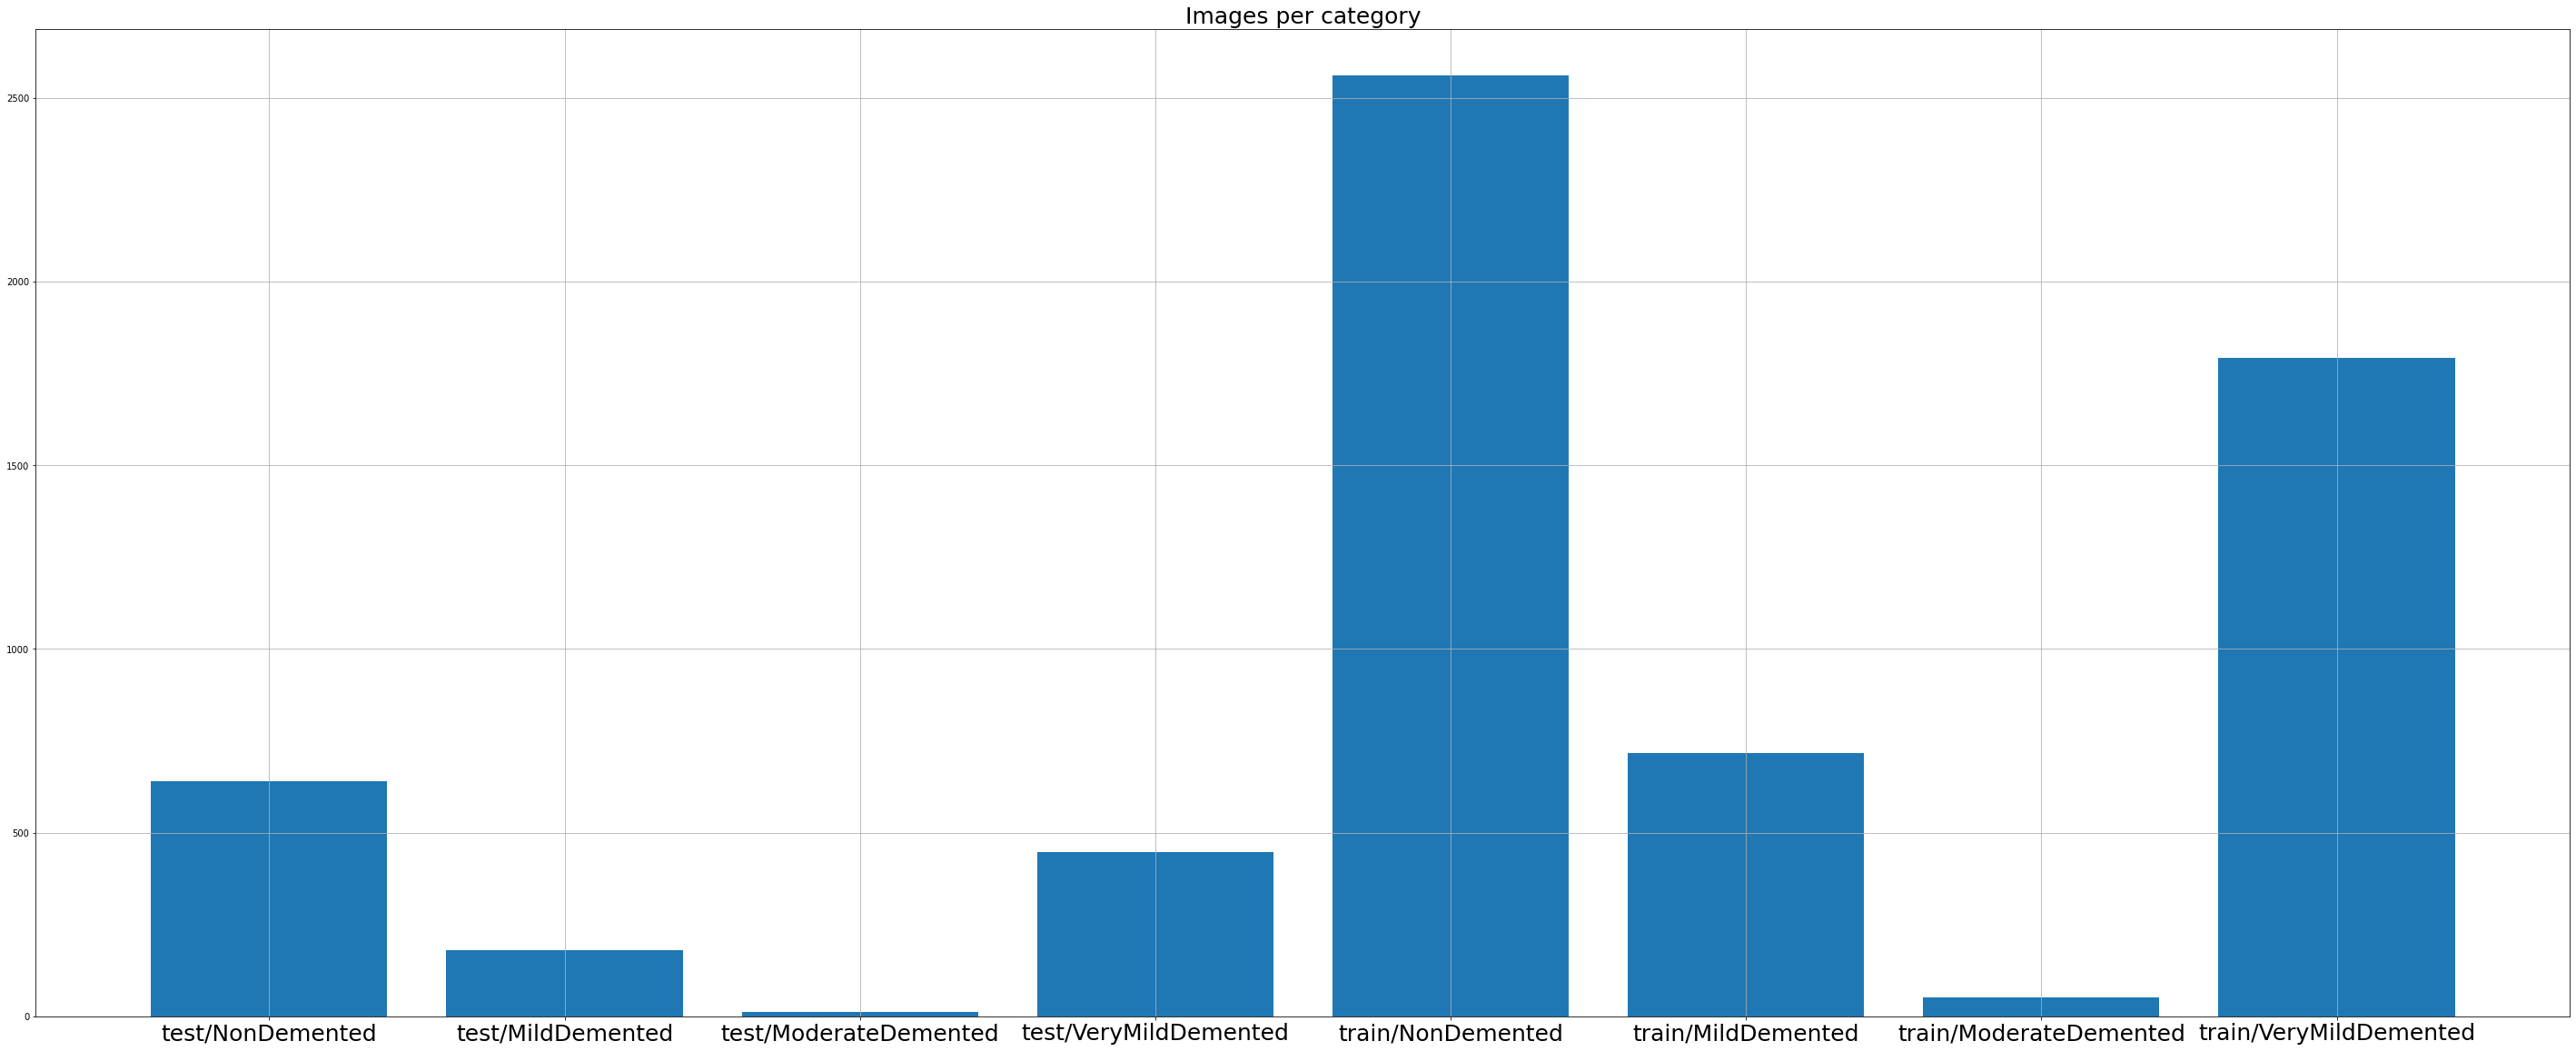

In [27]:
# lets plot this
categories = ['test/NonDemented','test/MildDemented','test/ModerateDemented','test/VeryMildDemented',
              'train/NonDemented', 'train/MildDemented','train/ModerateDemented','train/VeryMildDemented']
categories_len = [640, 179, 12, 448,
                  2560, 717, 52, 1792]

plt.bar(categories, categories_len)
plt.title('Images per category', fontsize=25)
plt.xticks(categories, fontsize=25)
plt.grid(True)
plt.rcParams["figure.figsize"] = (50, 20)
plt.show()

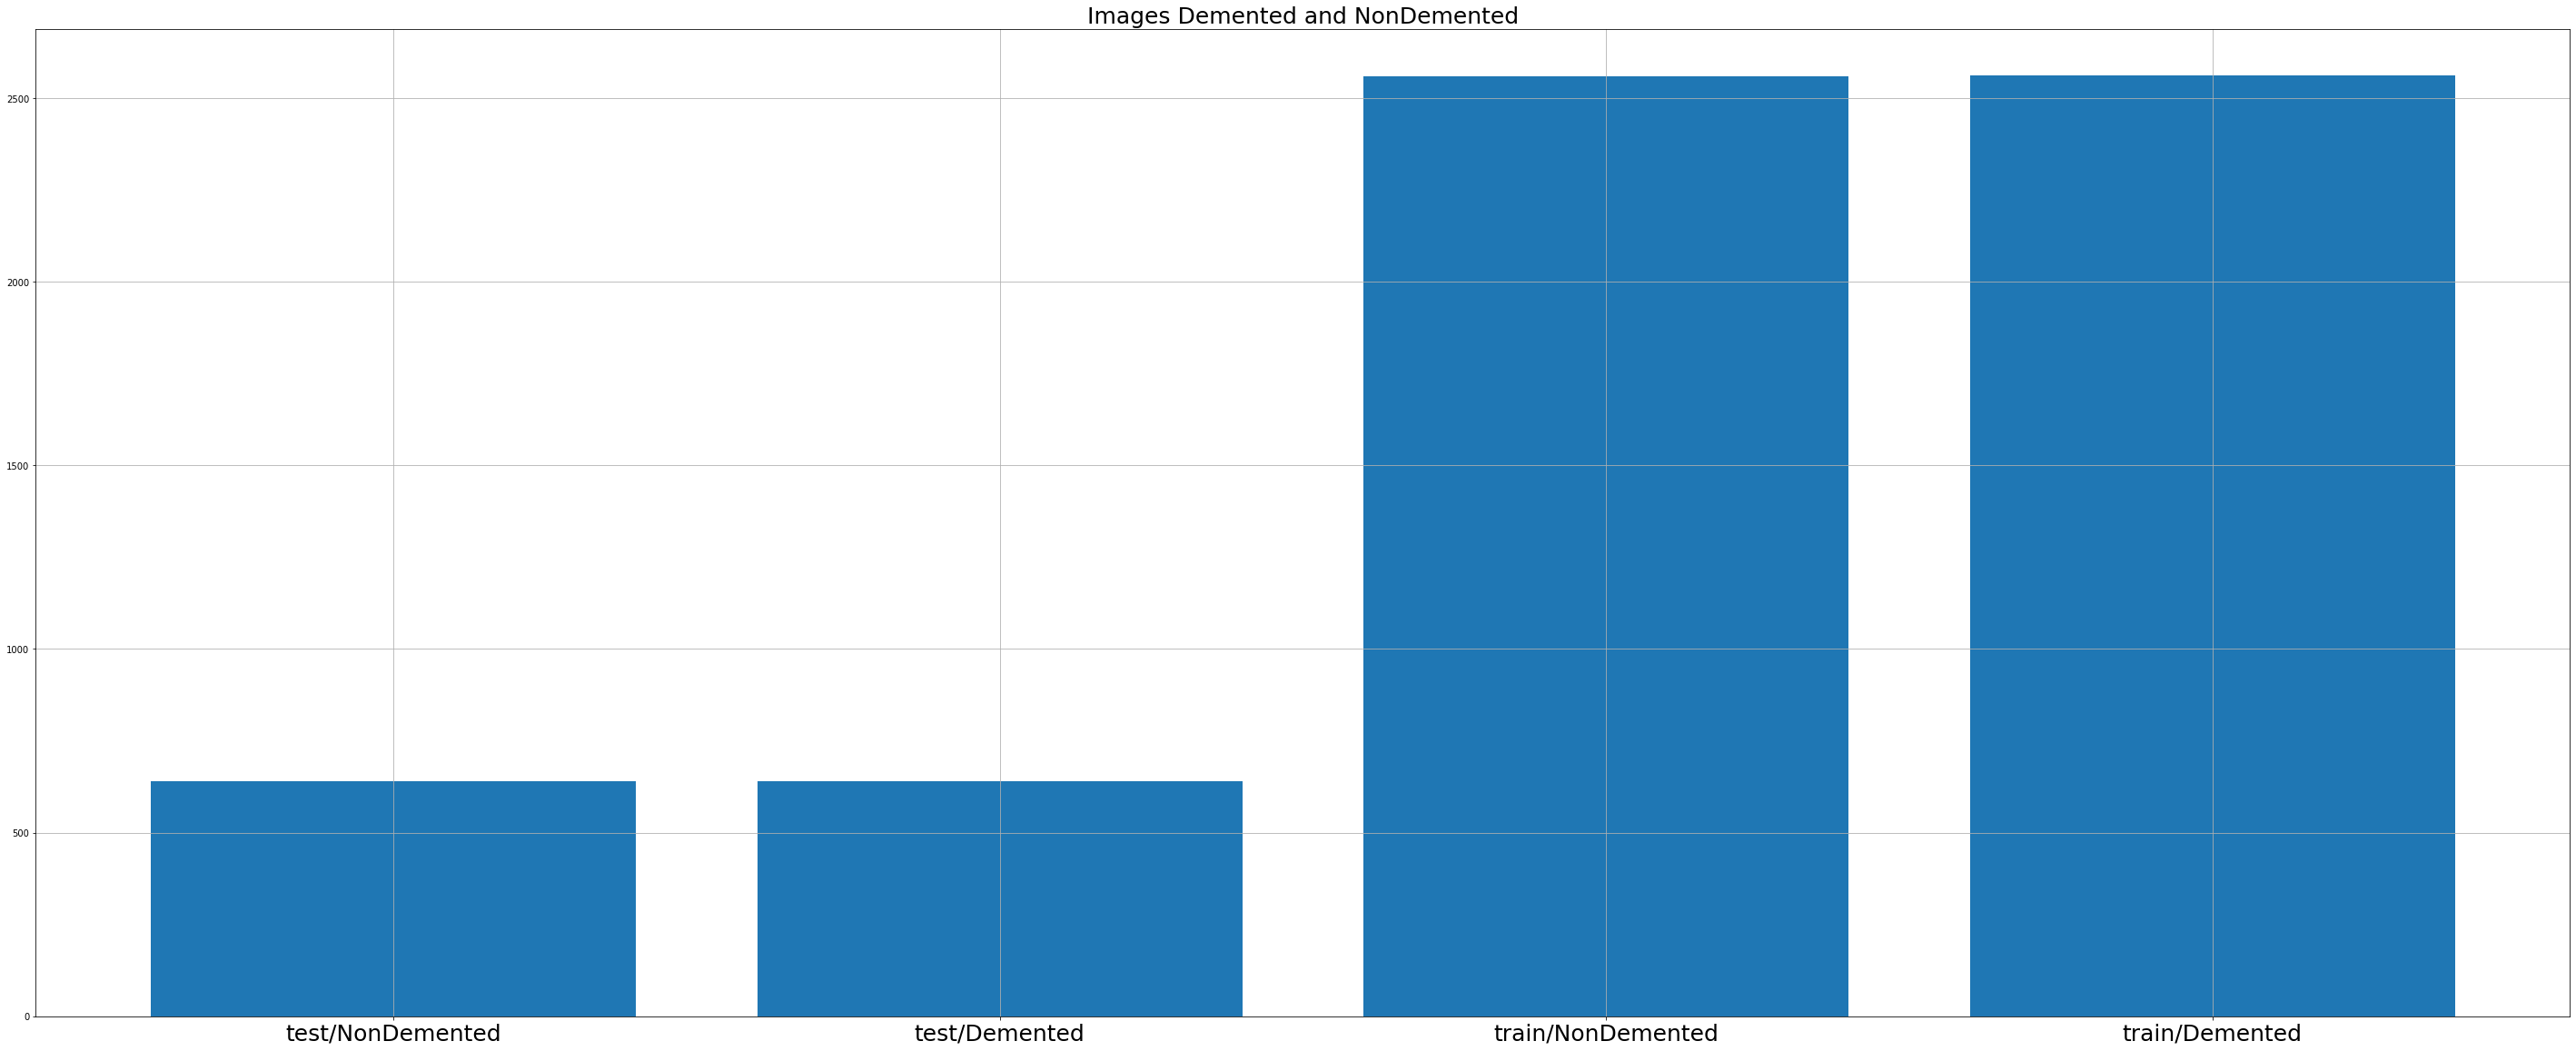

In [28]:
categories = ['test/NonDemented','test/Demented',
              'train/NonDemented', 'train/Demented']
categories_len = [640, 639,
                  2560, 2561]

plt.bar(categories, categories_len)
plt.title('Images Demented and NonDemented', fontsize=25)
plt.xticks(categories, fontsize=25)
plt.grid(True)
plt.rcParams["figure.figsize"] = (50, 20)
plt.show()

From the last couple of cells we can see that the dataset have around 51Mb in images. In total __6400 MRIs__ between train and test sets.

* In test set:
    * NonDemented: 640
    * VeryMildDemented: 448
    * MildDemented: 179
    * ModerateDemented: 12

* In train set:
    * NonDemented: 2560
    * VeryMildDemented: 1792
    * MildDemented: 717
    * ModerateDemented: 52

Defining Demented as any image labeled: VeryMildDemented, MildDemented, ModerateDemented, we have:

* NonDemented: 3200, Demented: 3200.
* With something like a disparity between Demented and NonDemented inside train and test sets:
    * test: NonDemented: 640, Demented: 639.
    * train: NonDemented: 2560, Demented: 2561.

In test set, one more NonDemented than Demented. And in train set, one more Demented than NonDemented. Maybe some coinsidence there but balanced in terms of demented and non-demented. Also, is important to notice that definetly the data is not balanced in terms of categories, in the train and test sets there is a big difference between MorerateDemented category and the rest, very few MorerateDemented images.

Now, lets define dataset paths, and some utility functions.

In [4]:
dataset_path = 'data/alzheimers_mri_dataset'

train_NonDemented_folder_path = f'{dataset_path}/train/NonDemented/'
train_VeryMildDemented_folder_path = f'{dataset_path}/train/VeryMildDemented'
train_MildDemented_folder_path = f'{dataset_path}/train/MildDemented'
train_ModerateDemented_folder_path = f'{dataset_path}/train/ModerateDemented'

test_NonDemented_folder_path = f'{dataset_path}/test/NonDemented'
test_VeryMildDemented_folder_path = f'{dataset_path}/test/VeryMildDemented'
test_MildDemented_folder_path = f'{dataset_path}/test/MildDemented'
test_ModerateDemented_folder_path = f'{dataset_path}/test/ModerateDemented'

dataset_imgs_list = glob.glob(f'{dataset_path}/**/**/*.jpg')
print('dataset_imgs_list', len(dataset_imgs_list))

train_NonDemented_files = glob.glob(f'{train_NonDemented_folder_path}/*.jpg')
train_VeryMildDemented_files = glob.glob(f'{train_VeryMildDemented_folder_path}/*.jpg')
train_MildDemented_files = glob.glob(f'{train_MildDemented_folder_path}/*.jpg')
train_ModerateDemented_files = glob.glob(f'{train_ModerateDemented_folder_path}/*.jpg')
print('train_NonDemented_files', len(train_NonDemented_files))
print('train_VeryMildDemented_files', len(train_VeryMildDemented_files))
print('train_MildDemented_files', len(train_MildDemented_files))
print('train_ModerateDemented_files', len(train_ModerateDemented_files))

test_NonDemented_files = glob.glob(f'{test_NonDemented_folder_path}/*.jpg')
test_VeryMildDemented_files = glob.glob(f'{test_VeryMildDemented_folder_path}/*.jpg')
test_MildDemented_files = glob.glob(f'{test_MildDemented_folder_path}/*.jpg')
test_ModerateDemented_files = glob.glob(f'{test_ModerateDemented_folder_path}/*.jpg')
print('test_NonDemented_files', len(test_NonDemented_files))
print('test_VeryMildDemented_files', len(test_VeryMildDemented_files))
print('test_MildDemented_files', len(test_MildDemented_files))
print('test_ModerateDemented_files', len(test_ModerateDemented_files))

dataset_imgs_list 6400
train_NonDemented_files 2560
train_VeryMildDemented_files 1792
train_MildDemented_files 717
train_ModerateDemented_files 52
test_NonDemented_files 640
test_VeryMildDemented_files 448
test_MildDemented_files 179
test_ModerateDemented_files 12


In [5]:
# Note: we know these are gray scale images, so we should directly show it like that,
# matplotlib would show images in rgb if we don't set it to gray scale.

def load_img(img_path):
    return Image.open(img_path, 'r')

def load_imgslist(img_paths):
    imgs = []
    for _path in img_paths:
        img = load_img(_path)
        imgs.append(img)
    return imgs

def show_img(img):
    imshow(np.asarray(img), cmap='gray')

def load_show_img(img_path):
    img = load_img(img_path)
    show_img(img)
    return img
    
def show_img_list(imgs_list, n_rows, n_cols, width, height):
    px = 10 / plt.rcParams['figure.dpi']
    fig = plt.figure(figsize=(width*px, height*px))
    grid = ImageGrid(fig, (1,1,1,1),
        nrows_ncols=(n_rows, n_cols),
        axes_pad=0.1,
    )

    for ax, _img in zip(grid, imgs_list):
        img = _img
        if isinstance(img, list):
            # show legend if possible
            img = _img[0]
            legend = _img[1]
            ax.text(4, 10, legend, fontsize=20, bbox={'facecolor': 'white', 'pad': 10})
        ax.imshow(img, cmap='gray')

    plt.show()
    
def get_nfirst_mri_set(img_paths, n, label):
    imgs = []
    for _path in img_paths[0:n]:
        img = load_img(_path)
        if label:
            imgs.append([img, label])
        imgs.append(img)
    return imgs

Lets inspect one single image:

In [6]:
img_nond_path = f'{train_NonDemented_folder_path}/nonDem114.jpg'
img_nond = load_img(img_nond_path)

print('img_nond', img_nond.size)

img_nond (176, 208)


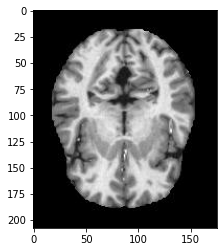

In [7]:
show_img(img_nond)

We can see here that, this MRI of a non demented brain, having __width 176__ and __height 208__. Also, we see that it's more or less centered (at naked eye), all gray matter it's kind of cropped, there is a good separationg between gray matter and non gray matter (black background), there is no bluriness or gradual transition between brain and background.

Lets look at 1 image per class side to side:

In [8]:
# I chose these just browsing the folders
img_vmd_path = f'{train_VeryMildDemented_folder_path}/verymildDem29.jpg'
img_md_path = f'{train_MildDemented_folder_path}/mildDem73.jpg'
img_modd_path = f'{train_ModerateDemented_folder_path}/moderateDem40.jpg'

img_vmd = load_img(img_vmd_path)
img_md = load_img(img_md_path)
img_modd = load_img(img_modd_path)

print('img_vmd', img_vmd.size)
print('img_md', img_md.size)
print('img_modd', img_modd.size)

img_vmd (176, 208)
img_md (176, 208)
img_modd (176, 208)


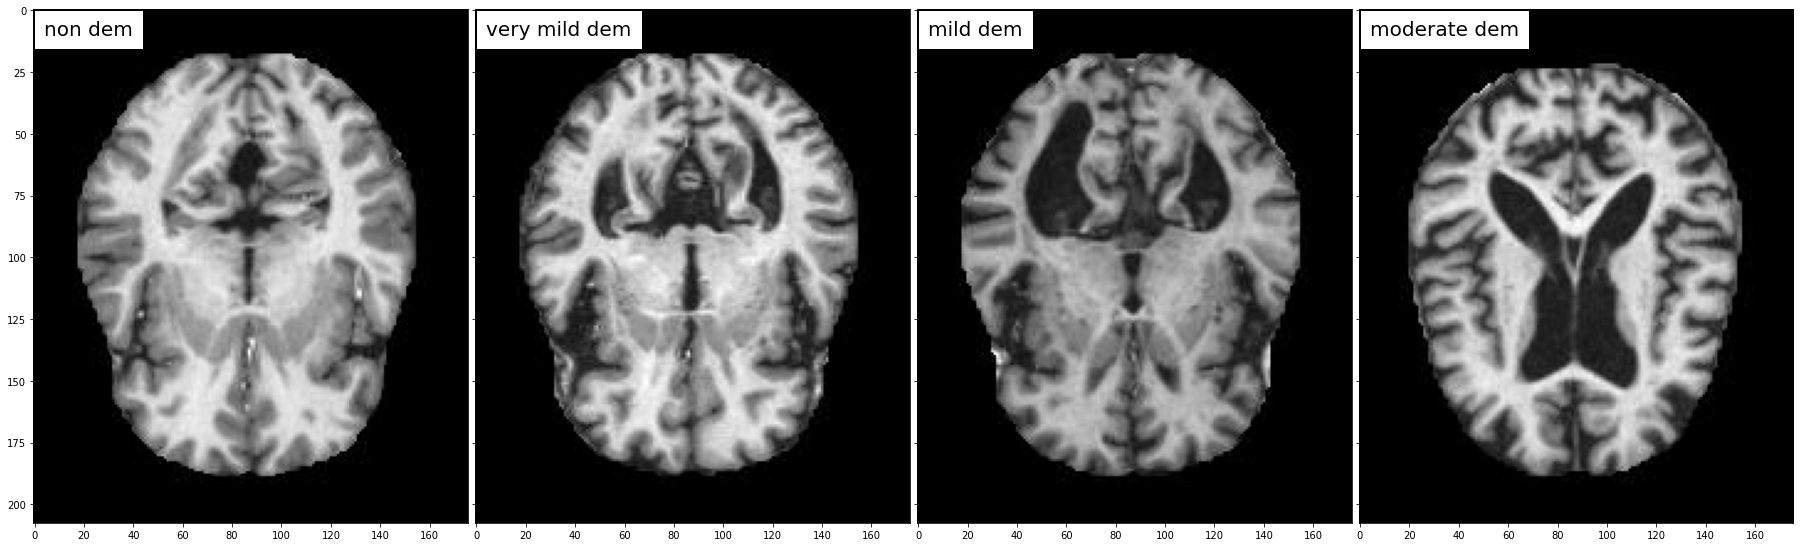

In [9]:
img_width, img_height = img_nond.size
imgs = [[img_nond, 'non dem'], [img_vmd, 'very mild dem'], [img_md, 'mild dem'], [img_modd, 'moderate dem']]

show_img_list(imgs, 1, 4, img_width, img_height)

We can see that the rest of images have the same resolution than the first image we checked, __width 176__ and __height 208__. And we can see some of the same characteristics we saw in the first one. Good separationg between brain and background, and the brain is centered in the image.

We also see something interesting, differences at naked eye between each class, and of course, a lot of differences between a non demented brain and a moderate demented brain.

Now lets see more images per each class:

In [10]:
nond_imgs = get_nfirst_mri_set(train_NonDemented_files, 8, 'non dem')
vmd_imgs = get_nfirst_mri_set(train_VeryMildDemented_files, 8, 'very mild dem')
md_imgs = get_nfirst_mri_set(train_MildDemented_files, 8, 'mild dem')
modd_imgs = get_nfirst_mri_set(train_ModerateDemented_files, 8, 'moderate dem')

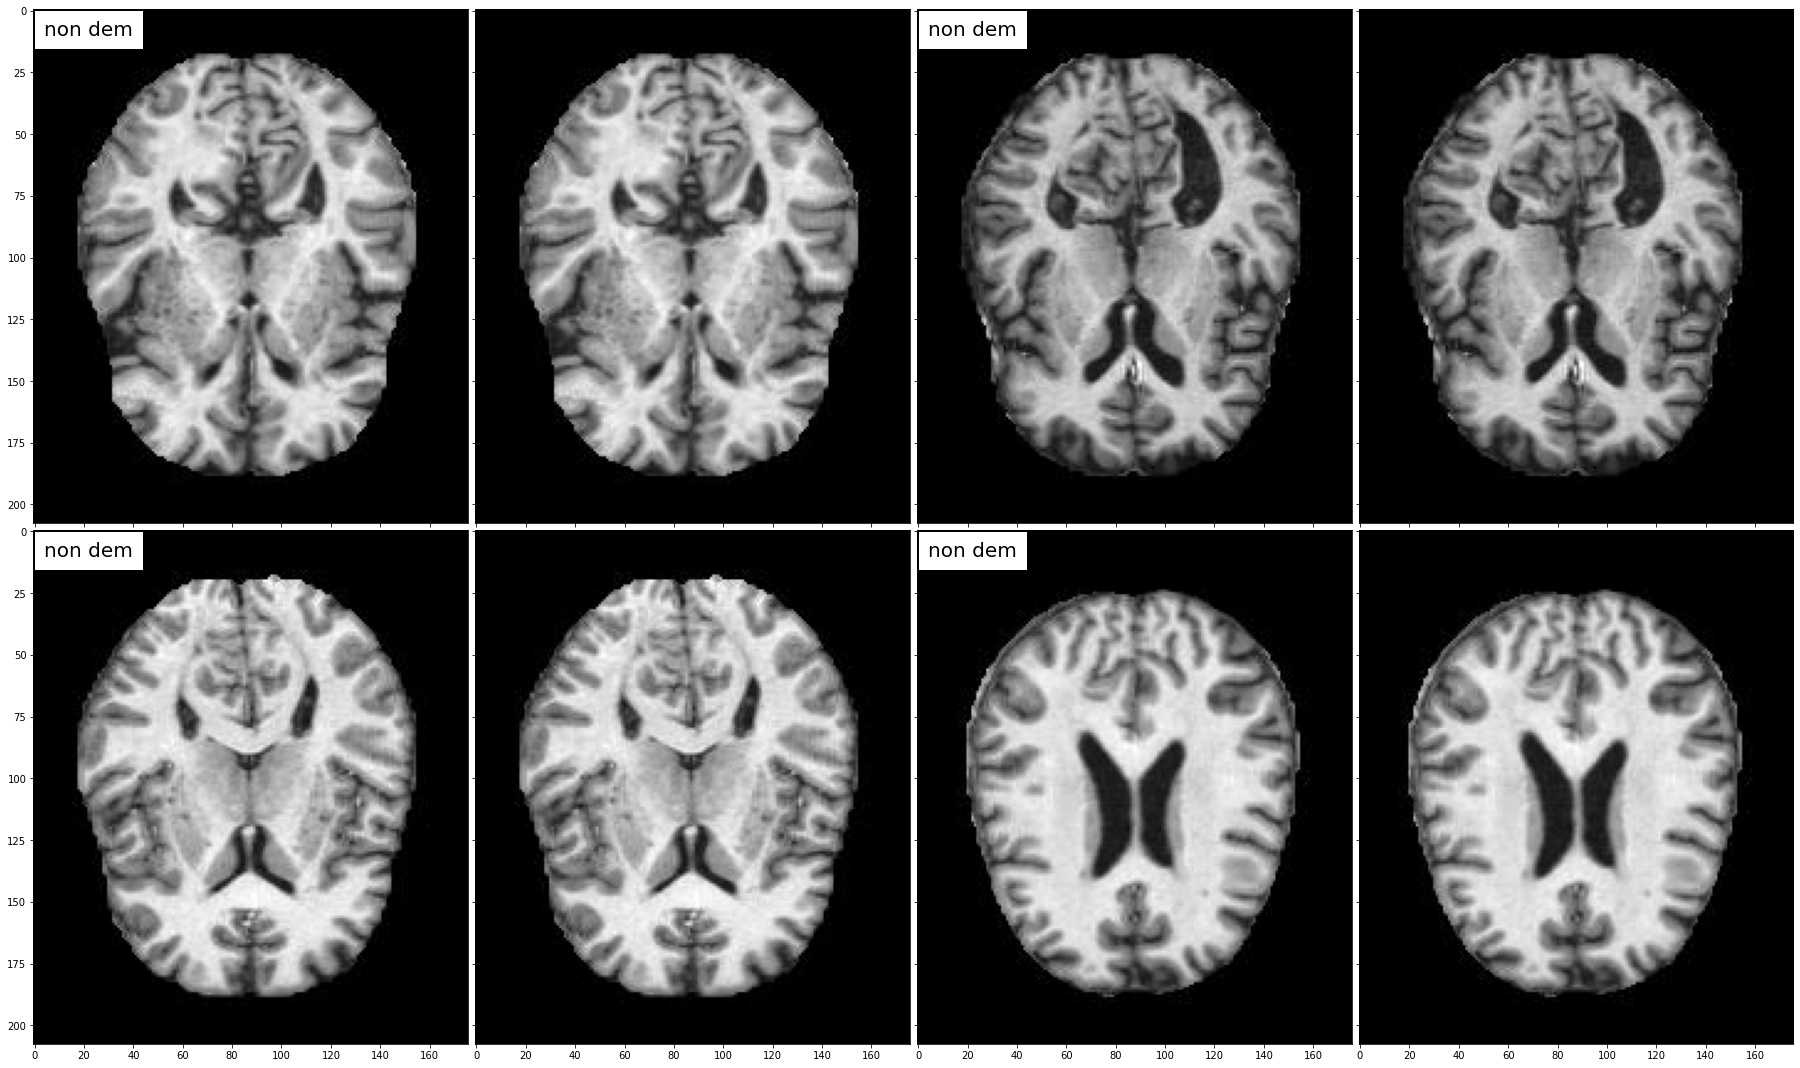

In [11]:
show_img_list(nond_imgs, 2, 4, img_width, img_height)

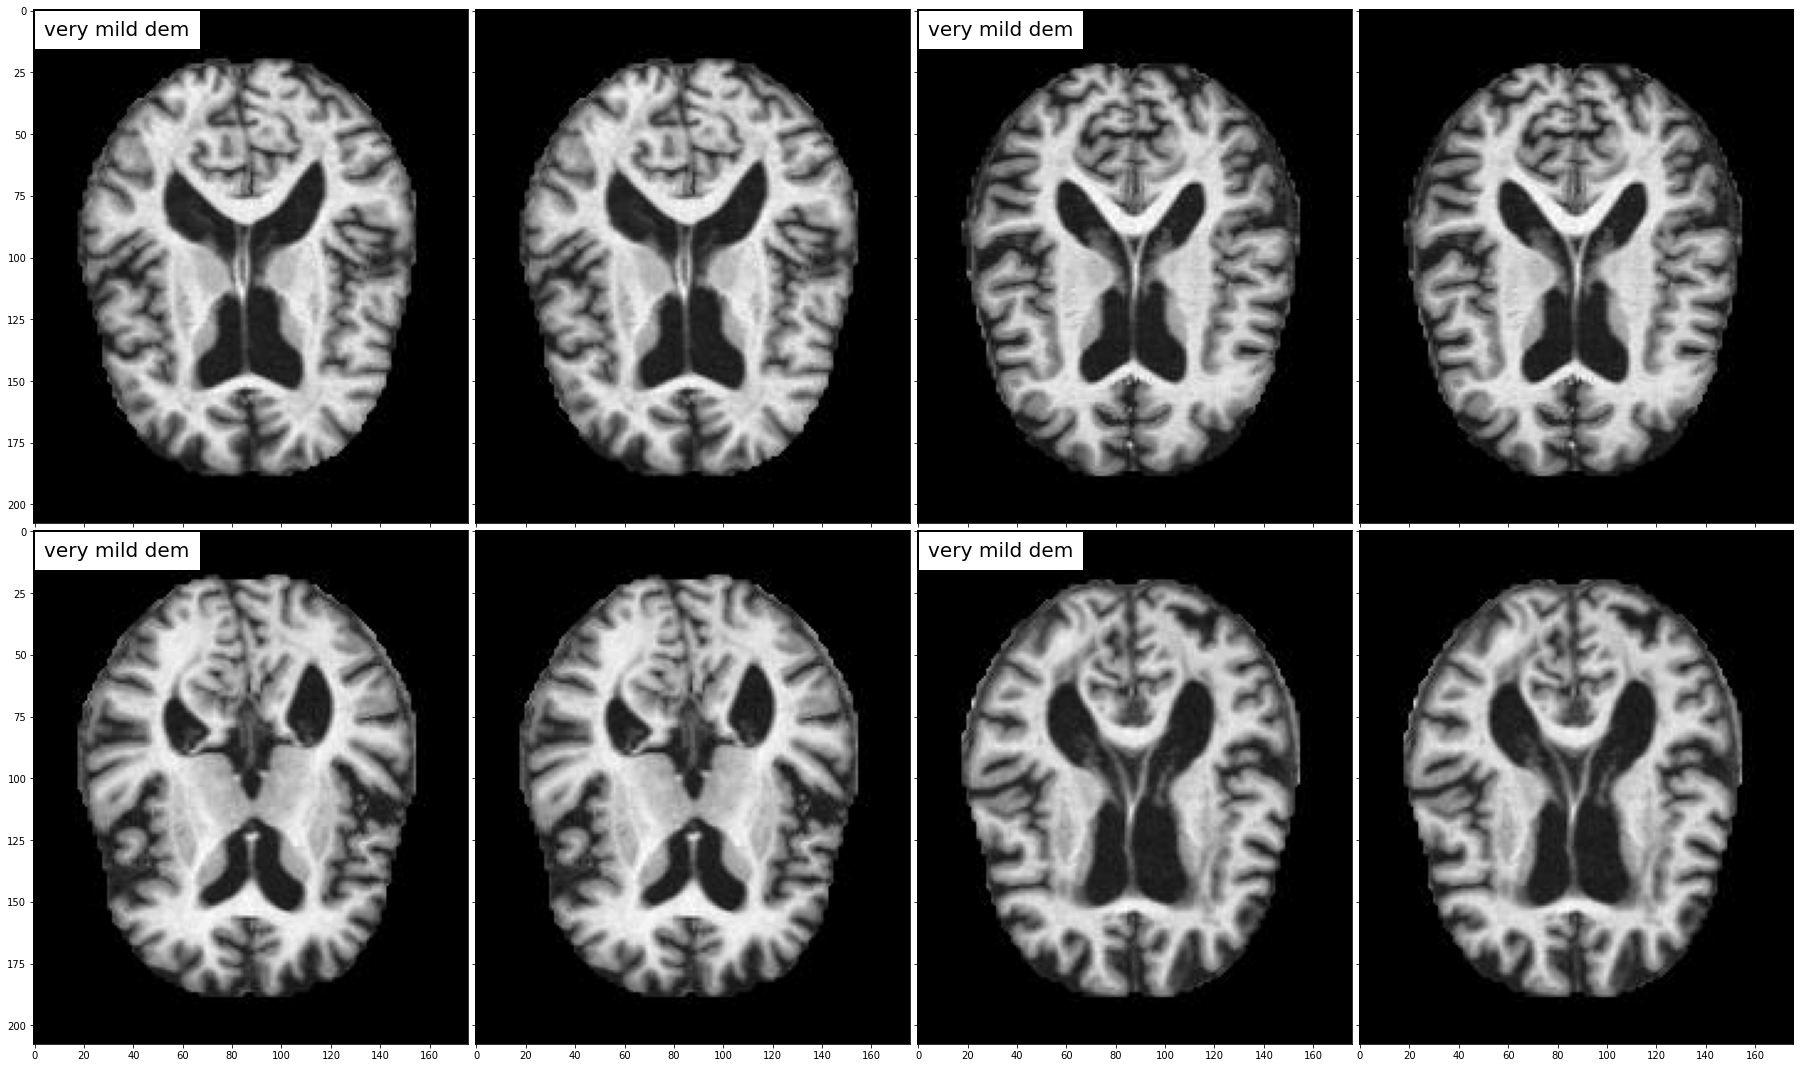

In [12]:
show_img_list(vmd_imgs, 2, 4, img_width, img_height)

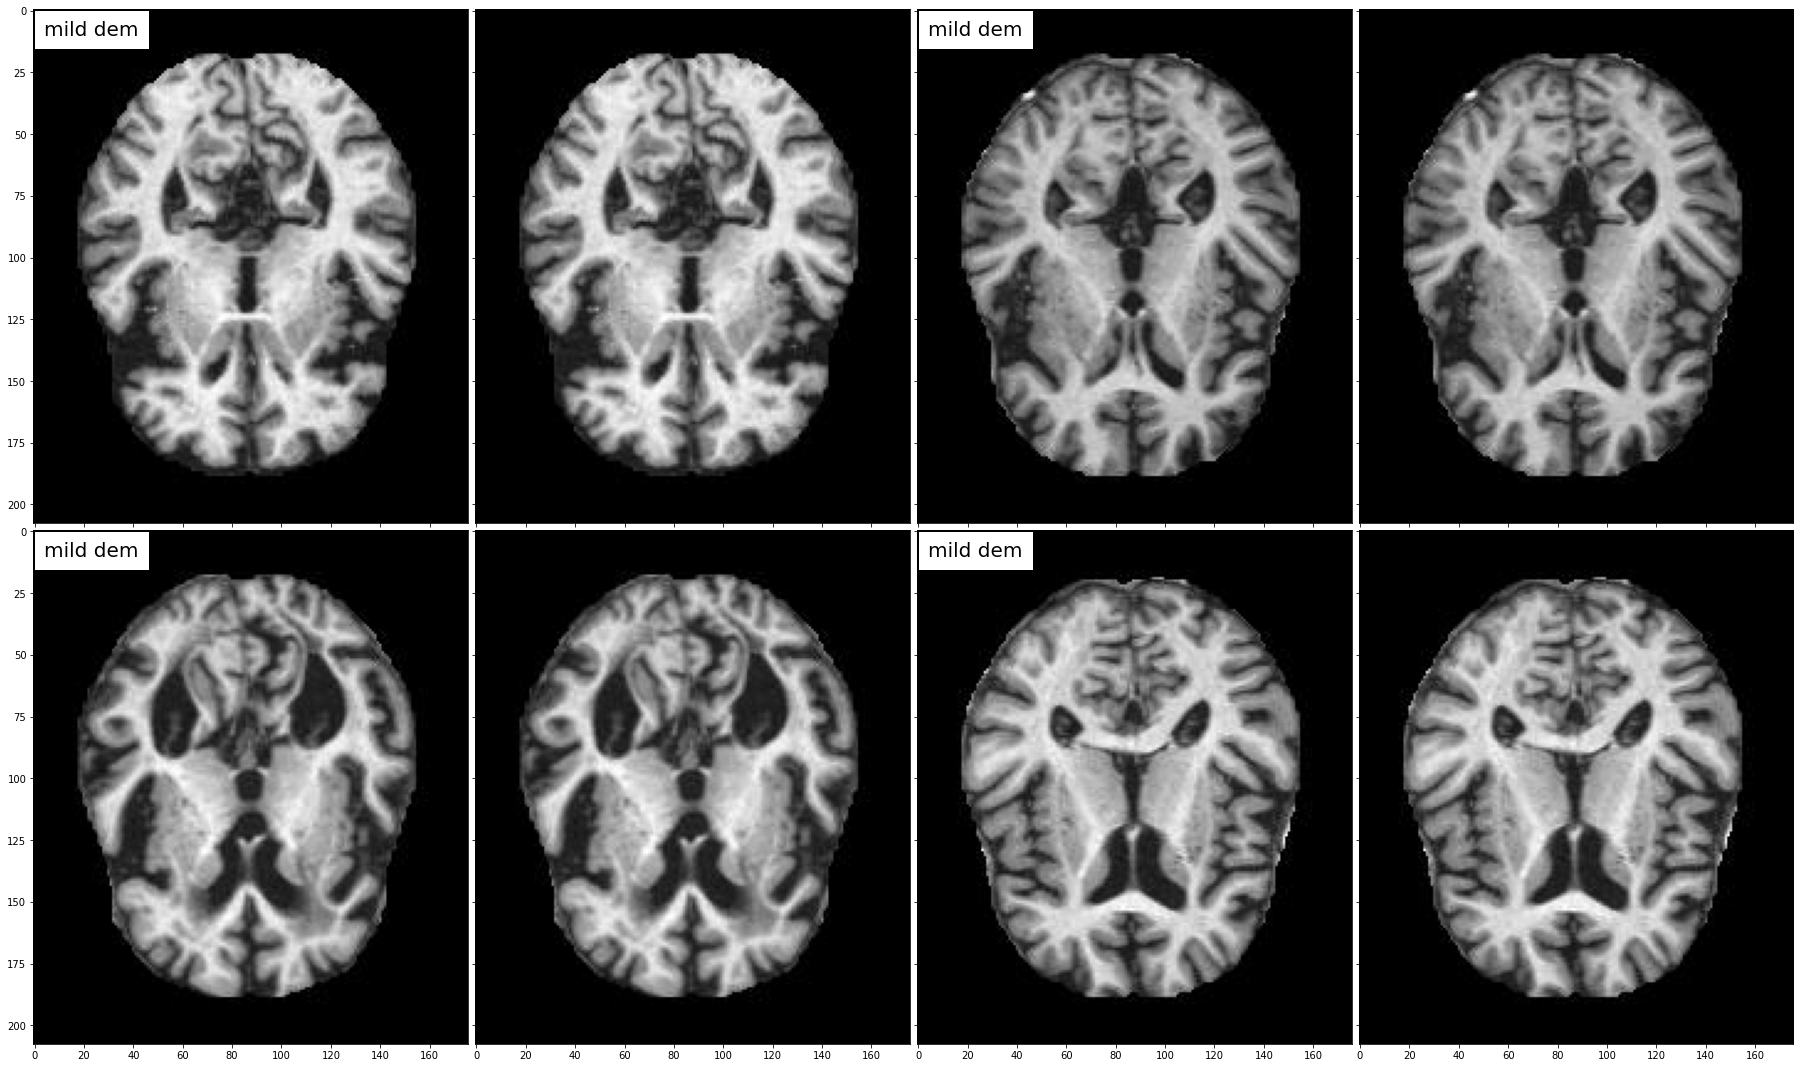

In [13]:
show_img_list(md_imgs, 2, 4, img_width, img_height)

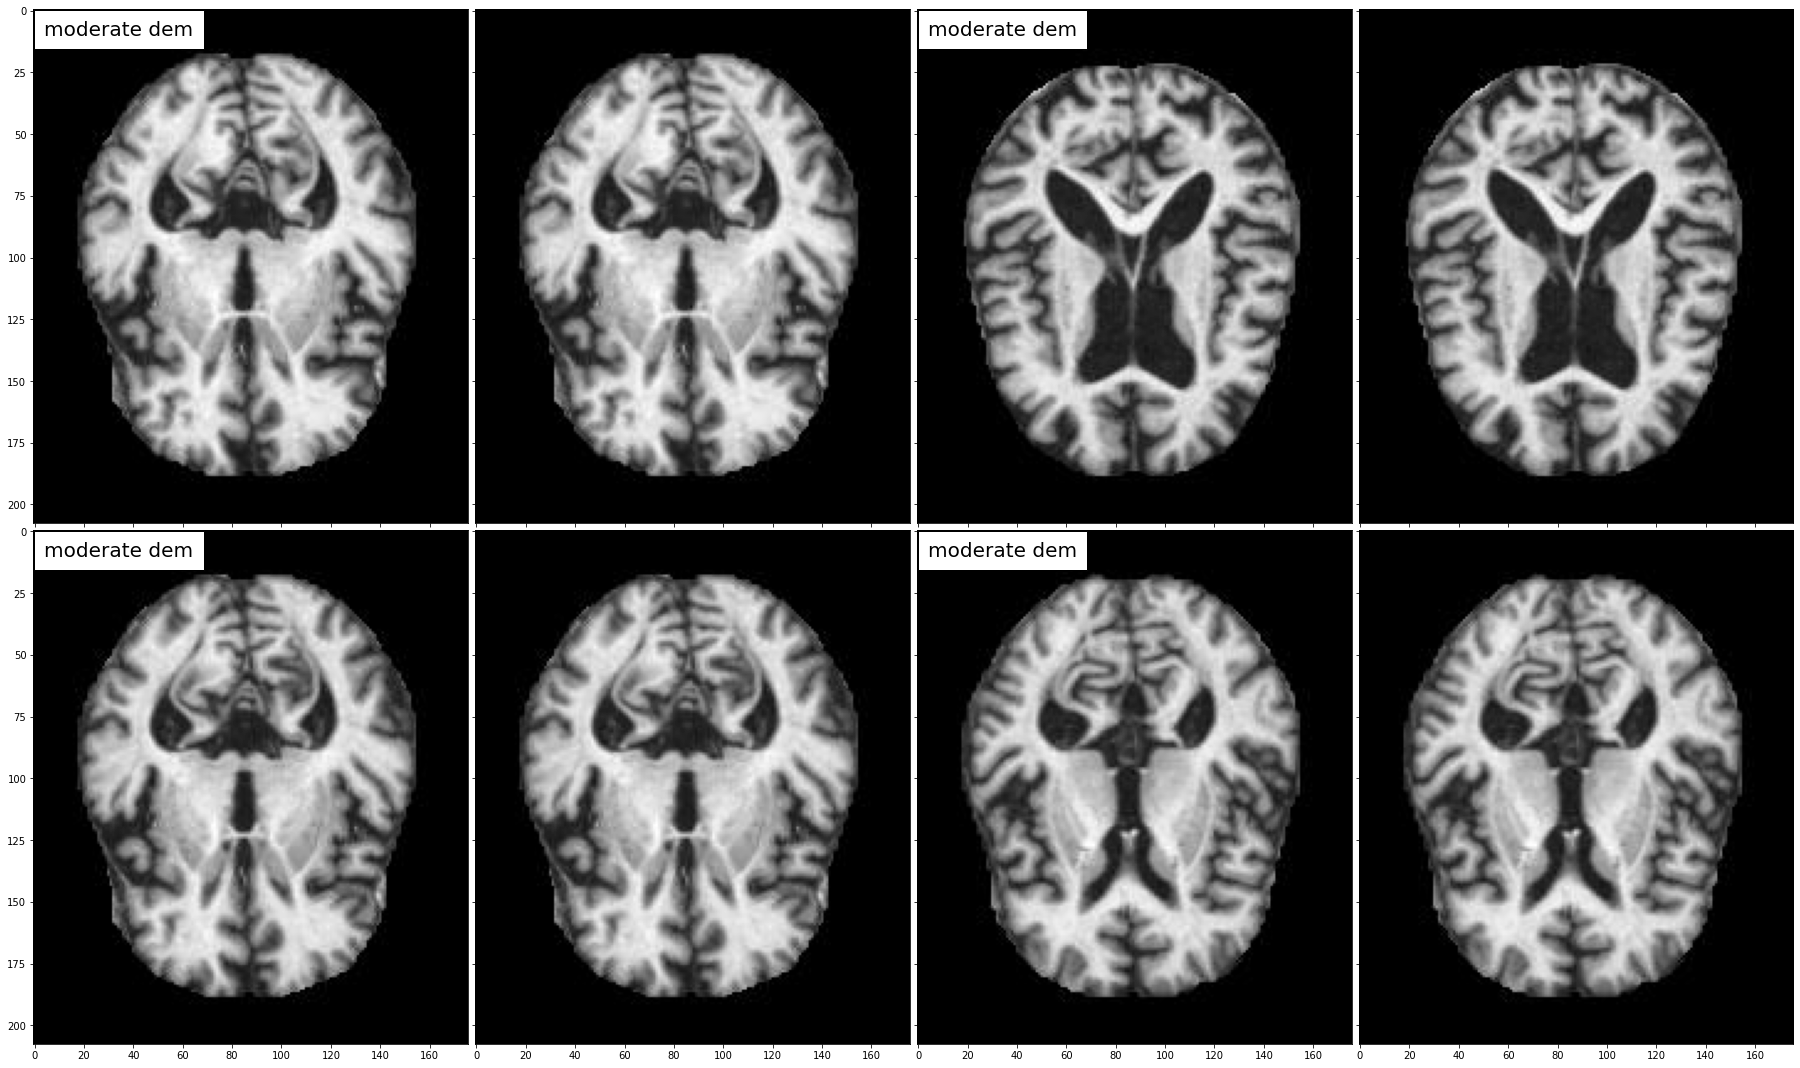

In [14]:
show_img_list(modd_imgs, 2, 4, img_width, img_height)

We can see these have the same resolution, good separation between brain matter and background, etc. More importantly, we see differences between each class, maybe not at naked eye that there are palpable differences between mild and very mild, but definitly there are big differences between non demented and moderate demented.

Now just to confirm that all images have the same size lets check that:

In [15]:
def assert_size(imgs_path_list, size):
    for _path in imgs_path_list:
        img = load_img(_path)
        assert(img.size == size)
        img.close()

In [16]:
assert_size(dataset_imgs_list, (176, 208))
print('All good!')

All good!


Now that we have inspected and visualize the dataset we can continue. All images are grayscale, all brains appear to be centred, there is good contrast for brain matter, and all images have the same size.